In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%%bash
apt-get -qq update
apt-get -qq install -y git cmake g++ unzip \
  libopenblas-dev liblapacke-dev libeigen3-dev \
  libtbb-dev libboost-all-dev libopencv-dev ffmpeg


(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../000-libpython3.10-dev_3.10.12-1~22.04.12_amd64.deb ...
Unpacking libpython3.10-dev:amd64 (3.10.12-1~22.04.12) over (3.10.12-1~22.04.11) ...
Preparing to unpack .../001-libpython3.10_3.10.12-1~22.04.12_amd64.deb ...
Unpacking libpython3.10:amd64 (3.10.12-1~22.04.12) over (3.10.12-1~22.04.11) ...
Preparing to unpack .../002-python3.10_3.10.12-1~22.04.12_amd64.deb ...
Unpacking python3.10 (3.10.12-1~22.04.12) over (3.10.12-1~22.04.11) ...
Preparing to unpack .../003-libpython3.10-stdlib_3.10.12-1~22.04.12_amd64.deb ...
Unpacking libpython3.10-stdlib:amd64 (3.10.12-1~22.04.12) over (3.10.12-1~22.04.11) ...
Preparing to unpack .../004-python3.10-minimal_3.10.12-1~22.04.12_amd64.deb ...
Unpacking python3.10-minimal (3.10.12-1~22.04.12) over (3.10.12-1~22.04.11) ...
Preparing to unpack .../005-libpython3.10-minimal_3.10.12-1~22.04.12_amd64.deb ...
Unpacking libpython3.10-minimal:amd64 (3.10.12-1~2

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [3]:
%%bash
set -e
cd /content
rm -rf dlib
git clone --depth 1 https://github.com/davisking/dlib.git
cd dlib
mkdir -p build && cd build
cmake .. -DDLIB_USE_CUDA=OFF -DUSE_AVX_INSTRUCTIONS=ON -DCMAKE_BUILD_TYPE=Release
cmake --build . --config Release -j2
cmake --install . --prefix /usr/local
# sanity: show where CMake package is
find /usr/local/lib -maxdepth 3 -name "dlibConfig.cmake" -print


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Using CMake version: 3.31.10
-- Compiling dlib version: 20.0.99
-- Enabling AVX instructions
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD - Success
-- Found Threads: TRUE
-- Found X11: /usr/include
-- Looking for XOpenDisplay in /usr/lib/x86_64-linux-gnu/libX11.so;/usr/lib/x86_64-linux-gnu/libXext.so
-- Looking for XOpenDisplay in /usr/lib/x86_64-linux-gnu/libX11.so;/usr/lib/x86_64-linux-gnu/libXext.so - found
-- Looking for gethostbyname
-- Looki

Cloning into 'dlib'...
 *****************************************************************************
 *** No JPEG XL libraries found.                                           ***
 *** On Ubuntu 23.04 and newer you can install them by executing           ***
 ***    sudo apt install libjxl-dev                                        ***
 ***                                                                       ***
 *** Otherwise, you can find precompiled packages here:                    ***
 ***    https://github.com/libjxl/libjxl/releases                          ***
 *****************************************************************************
 *****************************************************************************
 *** No FFMPEG/LIBAV libraries found.                                      ***
 *** On Ubuntu you can install them by executing                           ***
 ***    sudo apt install libavdevice-dev libavfilter-dev libavformat-dev   ***
 ***    sudo apt install liba

In [4]:
%%bash
set -e
cd /content
rm -rf OpenFace
git clone --depth 1 https://github.com/TadasBaltrusaitis/OpenFace.git
cd OpenFace
mkdir -p build && cd build
cmake .. -DCMAKE_BUILD_TYPE=Release -Ddlib_DIR=/usr/local/lib/cmake/dlib
make -j2


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenBLAS libraries: /usr/lib/x86_64-linux-gnu/libopenblas.so
-- Found OpenBLAS include: /usr/include/x86_64-linux-gnu
-- Found OpenCV: /usr (found suitable version "4.5.4", minimum required is "4.0") found components: core imgproc calib3d highgui objdetect
-- Found Boost: /usr/lib/x86_64-linux-gnu/cmake/Boost-1.74.0/BoostConfig.cmake (found suitable version "1.74.0", minimum required is "1.5.9") found components: filesystem system
-- Standalone mode detected; Enabling configuration

Cloning into 'OpenFace'...
Updating files: 100% (3672/3672), done.
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


OpenBLAS information:
  OpenBLAS_LIBRARIES: /usr/lib/x86_64-linux-gnu/libopenblas.so
  OpenBLAS_INCLUDE: /usr/include/x86_64-linux-gnu
OpenCV information:
  OpenCV_INCLUDE_DIRS: /usr/include/opencv4
  OpenCV_LIBRARIES: opencv_core;opencv_imgproc;opencv_calib3d;opencv_highgui;opencv_objdetect
  OpenCV_LIBRARY_DIRS: 
CMake Warning (dev) at CMakeLists.txt:42 (find_package):
  Policy CMP0167 is not set: The FindBoost module is removed.  Run "cmake
  --help-policy CMP0167" for policy details.  Use the cmake_policy command to
  set the policy and suppress this wa

In [5]:
%%bash
set -e
cd /content/OpenFace

# Tools
apt-get -qq update >/dev/null
apt-get -qq install -y curl unzip >/dev/null

# Get the official script from the repo ROOT (not models/)
curl -L --fail -o download_models.sh \
  https://raw.githubusercontent.com/TadasBaltrusaitis/OpenFace/master/download_models.sh
chmod +x download_models.sh

echo "== Running download_models.sh (up to 3 tries) =="
ok=0
for i in 1 2 3; do
  if ./download_models.sh; then ok=1; break; fi
  echo "Attempt $i failed; retrying in 4s…"
  sleep 4
done
if [ "$ok" -ne 1 ]; then
  echo "Could not fetch models after 3 tries (Dropbox/OneDrive hiccup). Re-run this cell once."
  exit 1
fi

# The script places models under lib/local/LandmarkDetector/model
MLOC="/content/OpenFace/lib/local/LandmarkDetector/model"

# Verify critical files
need=(
  "$MLOC/main_ceclm_general.txt"
  "$MLOC/cen_general.txt"
  "$MLOC/tris_68.txt"
  "$MLOC/pdms/In-the-wild_aligned_PDM_68.txt"
  "$MLOC/patch_experts/cen_patches_0.25_of.dat"
  "$MLOC/patch_experts/cen_patches_0.35_of.dat"
  "$MLOC/patch_experts/cen_patches_0.50_of.dat"
  "$MLOC/patch_experts/cen_patches_1.00_of.dat"
)
missing=0
for f in "${need[@]}"; do
  if [ ! -f "$f" ]; then echo "MISSING: $f"; missing=1; fi
done
if [ "$missing" -ne 0 ]; then
  echo "Some model files are missing (temporary mirror issue). Re-run this cell once."
  exit 1
fi

echo "Models ready at $MLOC"
ls -lh "$MLOC" | sed -n '1,80p'


== Running download_models.sh (up to 3 tries) ==
Models ready at /content/OpenFace/lib/local/LandmarkDetector/model
total 96K
-rw-r--r-- 1 root root  301 Dec  4 01:03 cen_general.txt
-rw-r--r-- 1 root root  245 Dec  4 01:03 clm_general.txt
-rw-r--r-- 1 root root  236 Dec  4 01:03 clm_wild.txt
-rw-r--r-- 1 root root  234 Dec  4 01:03 clnf_general.txt
-rw-r--r-- 1 root root  238 Dec  4 01:03 clnf_multi_pie.txt
-rw-r--r-- 1 root root  275 Dec  4 01:03 clnf_wild.txt
drwxr-xr-x 2 root root 4.0K Dec  4 01:03 detection_validation
-rw-r--r-- 1 root root  133 Dec  4 01:03 early_term_cen_of.txt
-rw-r--r-- 1 root root  117 Dec  4 01:03 haarAlign.txt
-rw-r--r-- 1 root root  335 Dec  4 01:03 main_ceclm_general.txt
-rw-r--r-- 1 root root  332 Dec  4 01:03 main_clm_general.txt
-rw-r--r-- 1 root root  329 Dec  4 01:03 main_clm_wild.txt
-rw-r--r-- 1 root root  360 Dec  4 01:03 main_clnf_demos.txt
-rw-r--r-- 1 root root  689 Dec  4 01:03 main_clnf_general.txt
-rw-r--r-- 1 root root  335 Dec  4 01:03 mai

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   926  100   926    0     0   2424      0 --:--:-- --:--:-- --:--:--  2424
--2025-12-04 01:10:13--  https://www.dropbox.com/s/7na5qsjzz8yfoer/cen_patches_0.25_of.dat
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/nbdylr41jbtpykft3m56s/cen_patches_0.25_of.dat?rlkey=r9juzsg39pn40wvv0seyfddz4 [following]
--2025-12-04 01:10:13--  https://www.dropbox.com/scl/fi/nbdylr41jbtpykft3m56s/cen_patches_0.25_of.dat?rlkey=r9juzsg39pn40wvv0seyfdd

In [6]:
%%bash
set -e

# Paths
BIN="/content/OpenFace/build/bin/FeatureExtraction"
MLOC="/content/OpenFace/lib/local/LandmarkDetector/model"   # where download_models.sh put them
IN="/content/drive/MyDrive/HRI_Test/Test.mp4"
OUT="/content/drive/MyDrive/HRI_Test/output"
CONV="$OUT/Test_conv.mp4"

# Make output dir
mkdir -p "$OUT"

# Ensure ffmpeg then re-encode to OpenCV-friendly H.264 baseline @ 30fps
apt-get -qq update >/dev/null
apt-get -qq install -y ffmpeg >/dev/null
ffmpeg -y -i "$IN" -vf "scale=960:-2,fps=30" \
  -c:v libx264 -preset fast -profile:v baseline -level 3.0 -pix_fmt yuv420p \
  -c:a aac "$CONV" >/dev/null 2>&1

# Run FeatureExtraction (capture logs but don't hard-fail the cell)
"$BIN" -f "$CONV" -aus -pose -gaze -2Dfp -tracked -mloc "$MLOC" -out_dir "$OUT" \
  > "$OUT/featureextraction_log.txt" 2>&1 || true

echo "== Output files =="
ls -lh "$OUT" | sed -n '1,200p' || true

echo; echo "== First lines of AU CSV (if present) =="
for f in "$OUT"/*_AU.csv "$OUT"/*_au.csv; do
  if [ -f "$f" ]; then
    echo "-- $f --"
    head -n 5 "$f"
    break
  fi
done

echo; echo "== Log tail =="
tail -n 60 "$OUT/featureextraction_log.txt" || true


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [7]:
%%bash
set -e

# Your paths
BIN="/content/OpenFace/build/bin/FeatureExtraction"
MODEL_DIR="/content/OpenFace/lib/local/LandmarkDetector/model"
VID="/content/drive/MyDrive/HRI_Test/Test.mp4"
OUT="/content/drive/MyDrive/HRI_Test/output"

# Check the binary and model dir exist
[ -x "$BIN" ] || { echo "FeatureExtraction not found at $BIN"; exit 1; }
[ -d "$MODEL_DIR" ] || { echo "Model dir not found at $MODEL_DIR"; exit 1; }

echo " Found FeatureExtraction and model dir"
ls -1 "$MODEL_DIR" | sed -n '1,40p'


 Found FeatureExtraction and model dir
cen_general.txt
clm_general.txt
clm_wild.txt
clnf_general.txt
clnf_multi_pie.txt
clnf_wild.txt
detection_validation
early_term_cen_of.txt
haarAlign.txt
main_ceclm_general.txt
main_clm_general.txt
main_clm_wild.txt
main_clnf_demos.txt
main_clnf_general.txt
main_clnf_multi_pie.txt
main_clnf_wild.txt
model_eye
model_inner
mtcnn_detector
patch_experts
pdms
tris_68_full.txt
tris_68.txt


In [9]:
%%bash
set -e
IN="/content/drive/MyDrive/HRI_Test/Test.mp4"
CONV="/content/drive/MyDrive/HRI_Test/Test_conv.mp4"

# Install ffmpeg if needed (silent)
apt-get -qq update >/dev/null
apt-get -qq install -y ffmpeg >/dev/null

# Re-encode: H.264 + yuv420p + 25 fps (keeps audio out to avoid oddities)
ffmpeg -y -i "$IN" \
  -vf "fps=25,scale=trunc(iw/2)*2:trunc(ih/2)*2,format=yuv420p" \
  -c:v libx264 -preset veryfast -crf 18 -pix_fmt yuv420p -an \
  "$CONV"

echo "Converted video:"
ffprobe -v error -show_streams -select_streams v -of compact=p=0:nk=1 "$CONV" || true


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshi

In [10]:
%%bash
set -e
BIN_DIR="/content/OpenFace/build/bin"
SRC="/content/OpenFace/lib/local/LandmarkDetector/model"
DST="$BIN_DIR/model"

# Point the binary's expected path to the real model folder
rm -rf "$DST"
ln -s "$SRC" "$DST"

echo "Symlink created:"
ls -l "$DST" | sed -n '1,60p'

# quick sanity: check one of the large files exists via the new path
[ -f "$DST/patch_experts/cen_patches_0.25_of.dat" ] || { echo "CEN patches still not visible via $DST"; exit 1; }
echo " Model files visible to the binary at $DST"


Symlink created:
lrwxrwxrwx 1 root root 50 Dec  4 01:13 /content/OpenFace/build/bin/model -> /content/OpenFace/lib/local/LandmarkDetector/model
 Model files visible to the binary at /content/OpenFace/build/bin/model


In [11]:
%%bash
set -e
BIN="/content/OpenFace/build/bin/FeatureExtraction"
IN="/content/drive/MyDrive/HRI_Test/Test_conv.mp4"
OUT="/content/drive/MyDrive/HRI_Test/output"
LOG="$OUT/featureextraction_log.txt"

mkdir -p "$OUT"

run_extraction () {
  local DET="$1"
  echo "---- Running with face_detector=$DET (no visualisation) ----"
  "$BIN" \
    -no_visualisation \
    -face_detector "$DET" \
    -f "$IN" \
    -out_dir "$OUT" \
    -aus -pose -gaze -2Dfp -tracked \
    2>&1 | tee "$LOG"
}

# Try: 1=Haar, then 0=HOG, then 2=MTCNN
if ! run_extraction 1 | grep -q "Finished processing"; then
  echo "Haar didn’t finish cleanly, trying HOG…"
  if ! run_extraction 0 | grep -q "Finished processing"; then
    echo "HOG didn’t finish cleanly, trying MTCNN…"
    run_extraction 2 || true
  fi
fi

echo
echo "== Output files =="
ls -lah "$OUT" | sed -n '1,200p'
echo
echo "== Tail of log =="
tail -n 100 "$LOG" || true


Haar didn’t finish cleanly, trying HOG…
HOG didn’t finish cleanly, trying MTCNN…
---- Running with face_detector=2 (no visualisation) ----
Could not find the HAAR face detector location
Reading the landmark detector/tracker from: /content/OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: /content/OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: /content/OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: /content/OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: /content/OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: /content/OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: /content/OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts f

In [12]:
from pathlib import Path
import pandas as pd

out_dir = Path("/content/drive/MyDrive/HRI_Test/output")
csv_path = out_dir / "Test_conv.csv"

df = pd.read_csv(csv_path)

# AU columns typically end with _r (regression) or _c (classification)
au_cols = [c for c in df.columns if c.startswith("AU") and (c.endswith("_r") or c.endswith("_c"))]

# Keep a few useful tracking columns too
keep = [c for c in ["frame", "timestamp", "confidence", "success", "face_id", "face"]
        if c in df.columns] + au_cols

au_df = df[keep].copy()

# keep only confident, successful frames
mask = (au_df.get("success", 1) == 1) & (au_df.get("confidence", 1.0) >= 0.8)
au_df_conf = au_df[mask].copy()

# --- Stress-related AUs from "You look stressed" (Blasberg et al., 2023) ---
# AU05 – Upper lid raiser (higher cortisol)
# AU07 – Lid tightener (higher subjective stress, lower HR & HF-HRV)
# AU10 – Upper lip raiser (higher cortisol)
# AU12 – Lip corner puller (smiling; linked to lower cortisol, stress-buffering)
# AU23 – Lip tightener (higher heart rate)
# AU26 – Jaw drop (higher heart rate; also influenced by speaking)

key_bases = ["AU05", "AU07", "AU10", "AU12", "AU23", "AU26"]


# Find actual column names for each base AU (e.g. AU05_r, AU05_c)
key_au_cols = []
for base in key_bases:
    for suffix in ["_r", "_c"]:
        col = base + suffix
        if col in au_df_conf.columns:
            key_au_cols.append(col)

# Drop duplicates in case both _r and _c exist and were added
key_au_cols = list(dict.fromkeys(key_au_cols))

# Compute a simple "facial stress index" as the mean of the key AUs per frame
# (only using whichever key AU columns are actually present)
if key_au_cols:
    au_df_conf["facial_stress_index"] = au_df_conf[key_au_cols].mean(axis=1)
else:
    # If none of the key AUs are present, create a NaN column so downstream code doesn't break
    au_df_conf["facial_stress_index"] = float("nan")

# Save: full AU table and filtered (confident frames)
au_all_path = out_dir / "Test_conv_au_only.csv"
au_conf_path = out_dir / "Test_conv_au_only_conf08.csv"
au_df.to_csv(au_all_path, index=False)
au_df_conf.to_csv(au_conf_path, index=False)

print("Saved:")
print(" -", au_all_path)
print(" -", au_conf_path)
print("Total AU columns:", len(au_cols))
print("Key stress AUs found:", key_au_cols)
print(au_df_conf[["frame", "timestamp", "facial_stress_index"] + key_au_cols].head(5))


Saved:
 - /content/drive/MyDrive/HRI_Test/output/Test_conv_au_only.csv
 - /content/drive/MyDrive/HRI_Test/output/Test_conv_au_only_conf08.csv
Total AU columns: 35
Key stress AUs found: ['AU05_r', 'AU05_c', 'AU07_r', 'AU07_c', 'AU10_r', 'AU10_c', 'AU12_r', 'AU12_c', 'AU23_r', 'AU23_c', 'AU26_r', 'AU26_c']
   frame  timestamp  facial_stress_index  AU05_r  AU05_c  AU07_r  AU07_c  \
0      1       0.00             0.368333    0.00     1.0    1.16     0.0   
1      2       0.04             0.365833    0.10     1.0    1.12     0.0   
2      3       0.08             0.342500    0.10     1.0    0.95     0.0   
3      4       0.12             0.315000    0.04     1.0    0.75     0.0   
4      5       0.16             0.302500    0.00     1.0    0.76     0.0   

   AU10_r  AU10_c  AU12_r  AU12_c  AU23_r  AU23_c  AU26_r  AU26_c  
0     0.0     0.0    0.00     0.0    1.26     1.0     0.0     0.0  
1     0.0     0.0    0.11     0.0    1.06     1.0     0.0     0.0  
2     0.0     0.0    0.15     0.0

In [13]:
summary = au_df_conf[au_cols].describe().T[["mean","std","min","max"]]
summary_path = out_dir / "Test_conv_au_summary.csv"
summary.to_csv(summary_path)
print("Summary saved to:", summary_path)
summary.head(10)


Summary saved to: /content/drive/MyDrive/HRI_Test/output/Test_conv_au_summary.csv


,mean,std,min,max
AU01_r,0.187519,0.287925,0.0,1.73
AU02_r,0.084301,0.191259,0.0,1.64
AU04_r,0.763603,0.421353,0.0,2.00
AU05_r,0.100974,0.268312,0.0,1.83
AU06_r,0.013443,0.072508,0.0,1.24
AU07_r,0.429174,0.481092,0.0,2.29
AU09_r,0.138301,0.284549,0.0,1.99
AU10_r,0.009591,0.065332,0.0,1.18
AU12_r,0.051054,0.138685,0.0,1.02
AU14_r,0.101528,0.281466,0.0,2.35


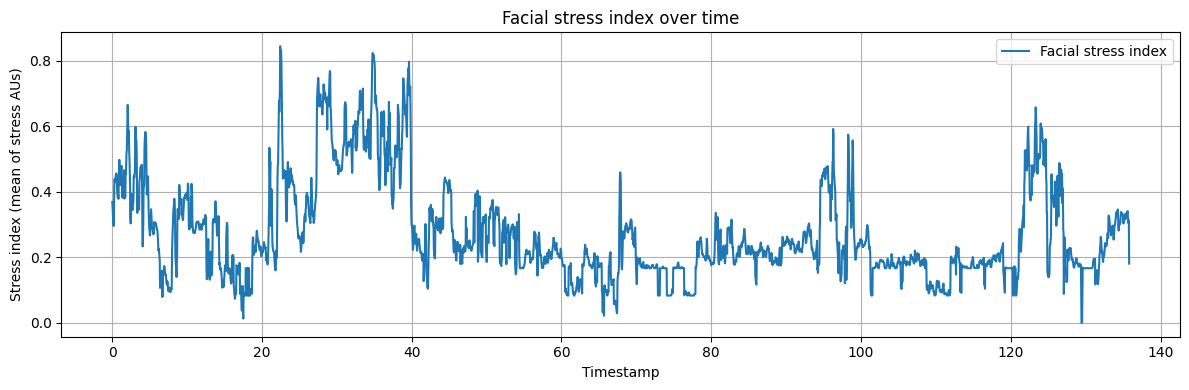

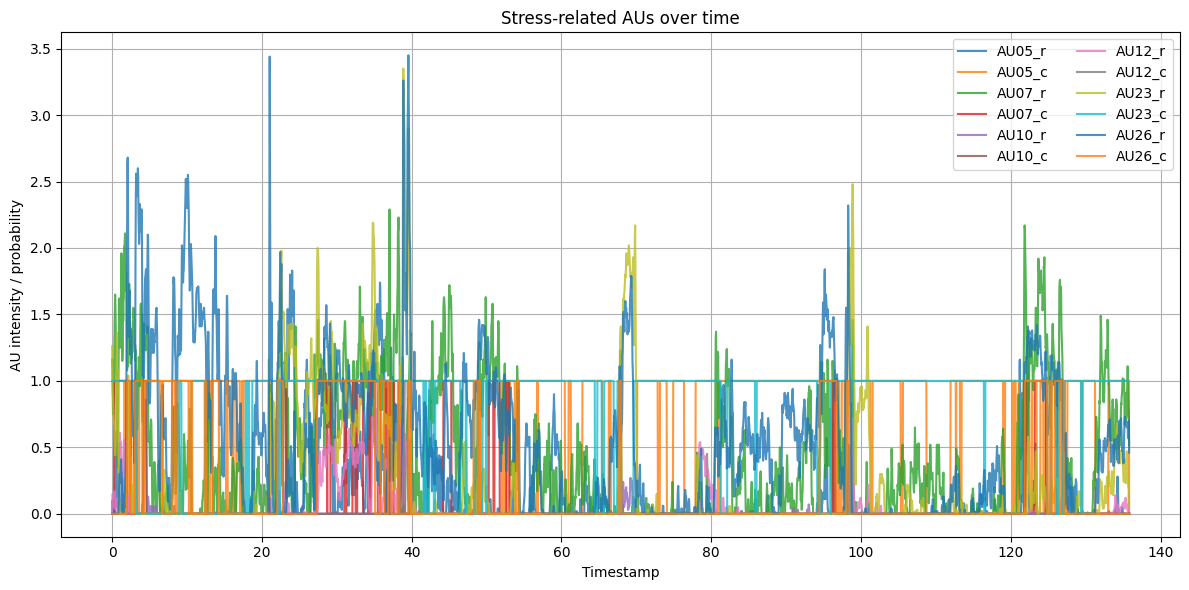

In [15]:
# Visualisation of stress index and stress-related AUs

import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd


# 1) Make sure we have au_df_conf in memory

if "au_df_conf" not in globals():
    # Fall back to loading the filtered AU file
    out_dir = Path("/content/drive/MyDrive/HRI_Test/output")
    au_conf_path = out_dir / "Test_conv_au_only_conf08.csv"
    au_df_conf = pd.read_csv(au_conf_path)

# Choose time axis: use timestamp if available, otherwise frame index
time_col = "timestamp" if "timestamp" in au_df_conf.columns else "frame"
time_vals = au_df_conf[time_col]


# 2) Plot the facial stress index over time

if "facial_stress_index" in au_df_conf.columns:
    plt.figure(figsize=(12, 4))
    plt.plot(time_vals, au_df_conf["facial_stress_index"], label="Facial stress index")
    plt.xlabel(time_col.capitalize())
    plt.ylabel("Stress index (mean of stress AUs)")
    plt.title("Facial stress index over time")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No 'facial_stress_index' column found. "
          "Make sure the AU processing cell has been run.")


# 3) Plot each stress-related AU over time (using the same set as the paper and your index)


stress_au_bases = ["AU05", "AU07", "AU10", "AU12", "AU23", "AU26"]

# Find actual column names present (e.g., AU05_r, AU05_c, etc.)
stress_au_cols = []
for base in stress_au_bases:
    for suffix in ["_r", "_c"]:
        col = base + suffix
        if col in au_df_conf.columns:
            stress_au_cols.append(col)

stress_au_cols = list(dict.fromkeys(stress_au_cols))

if stress_au_cols:
    plt.figure(figsize=(12, 6))
    for col in stress_au_cols:
        plt.plot(time_vals, au_df_conf[col], label=col, alpha=0.8)
    plt.xlabel(time_col.capitalize())
    plt.ylabel("AU intensity / probability")
    plt.title("Stress-related AUs over time")
    plt.legend(loc="upper right", ncol=2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No stress-related AU columns (AU05/07/10/12/23/26) found to plot.")
